# Step 1: import libraries

<p style="text-align: justify "> 
.....
</p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score, f1_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import  SVC


# Step 2: Load Dataset

In [2]:

data = pd.read_csv("Dataset/train_100r.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,...,26.770957,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792
1,1,0,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,...,13.444048,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751
2,2,0,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,...,16.217174,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198
3,3,0,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,...,30.842052,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056
4,4,1,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,...,31.950207,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414


In [3]:
diagnosis = data['diagnosis']
data.drop( labels= ['id', 'diagnosis' ], axis= 1, inplace= True )
data['diagnosis'] = diagnosis
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,18.382336,7.256714,91.377706,451.701127,0.078681,0.135853,0.290649,0.120906,0.210508,0.055248,...,13.025038,116.746455,962.654199,0.118997,0.319514,0.783059,0.198664,0.529692,0.160792,1
1,10.302042,16.758441,97.568306,320.033091,0.129037,0.090188,0.043289,0.018798,0.226011,0.055626,...,25.704716,96.355024,219.245739,0.157770,0.122358,0.022506,0.109841,0.279209,0.075751,0
2,8.045502,16.094636,78.540549,600.655293,0.077613,0.064573,0.007241,0.054136,0.186815,0.051772,...,22.345908,112.749125,816.143560,0.110365,0.093854,0.411800,0.076750,0.343249,0.093198,0
3,11.064261,26.550410,67.836043,415.104126,0.116053,0.104673,0.094656,0.024589,0.221436,0.068286,...,24.488840,109.580566,735.080454,0.119673,0.174270,0.062492,0.032425,0.361843,0.090056,0
4,6.892966,27.320674,155.892797,388.564447,0.116123,0.110978,0.122121,0.046933,0.301315,0.059410,...,22.585051,89.875289,1392.646916,0.114831,0.166710,0.198205,0.180283,0.342547,0.105414,1



<p style="text-align: justify "> 
    Dataset provided has various features that describe breast cancer as malignant or benign. Provided are 25524 records and 30 elements that define the output dependent variable.
</p>

We may have a better grasp of each column and the sort of data it contains by reading the sections below:
<ol>   
<li>ID Number:</li> The serial number of each record in the dataset is stored in this integer type field.
<li>Diagnosis:</li> This column contains our tagged data on whether a doctor diagnosed the patient was diagnosed with breast cancer, with "M" representing a malignant cancer cell and "B" representing tumour cells.
<li>Radius:</li> This column of type integer contains information on each patient's cancer cell at the time of therapy. The radius is the average of the distances between the centre and the points on the periphery.
<li>Texture:</li> This integer type column contains information on the texture of each patient's cancer cells at the time of therapy. The standard deviation of grey-scale values is known as texture.
<li>Perimeter:</li> At the time of therapy, this column of type integer holds information on the perimeter of each patient's cancer cell.
<li>Area:</li> This column of type integer contains information on the area of each cancer cell at the time of therapy.
<li>Smoothness:</li> This integer type column offers local variation in radius lengths.
<li>Compactness:</li> This integer type column offers data on the compactness of each cancer cell. The compactness is calculated by using the formula perimeter^2 / area - 1.0.
<li>Concavity:</li> This integer type column contains information about the severity of concave sections of each cancer cell's shape.
<li>Concave points:</li> This integer type column contains information about the number of concave portions of the contour of each cancer cell's shape.
<li>Symmetry:</li> This integer type column contains information about the symmetry of each cancer cell's shape.
<li>Fractal dimension:</li> This integer type column contains information about the coastline approximation of each cancer cell's shape.
<ol>
    


<p style="text-align: justify "> 
For each picture, the mean, standard error, and "worst" or worst (mean of the three most significant values) features were computed, yielding 30 features.
</p>

# Step 3: Exploratory Data Analysis

In [4]:
# Size of data set
data.shape

(25524, 31)

<p style="text-align: justify "> 
    We have 25524 records and 32 features. Out of 32 features we have 31 independent features and the dependent feature is diagnosis
</p>


In [5]:
# information about data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25524 entries, 0 to 25523
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              25524 non-null  float64
 1   texture_mean             25524 non-null  float64
 2   perimeter_mean           25524 non-null  float64
 3   area_mean                25524 non-null  float64
 4   smoothness_mean          25524 non-null  float64
 5   compactness_mean         25524 non-null  float64
 6   concavity_mean           25524 non-null  float64
 7   concave points_mean      25524 non-null  float64
 8   symmetry_mean            25524 non-null  float64
 9   fractal_dimension_mean   25524 non-null  float64
 10  radius_se                25524 non-null  float64
 11  texture_se               25524 non-null  float64
 12  perimeter_se             25524 non-null  float64
 13  area_se                  25524 non-null  float64
 14  smoothness_se         

### 3.1 Analyse Null Values

In [6]:
# see the number of null values 
for feature_name in data.columns:
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

radius_mean -> 0
texture_mean -> 0
perimeter_mean -> 0
area_mean -> 0
smoothness_mean -> 0
compactness_mean -> 0
concavity_mean -> 0
concave points_mean -> 0
symmetry_mean -> 0
fractal_dimension_mean -> 0
radius_se -> 0
texture_se -> 0
perimeter_se -> 0
area_se -> 0
smoothness_se -> 0
compactness_se -> 0
concavity_se -> 0
concave points_se -> 0
symmetry_se -> 0
fractal_dimension_se -> 0
radius_worst -> 0
texture_worst -> 0
perimeter_worst -> 0
area_worst -> 0
smoothness_worst -> 0
compactness_worst -> 0
concavity_worst -> 0
concave points_worst -> 0
symmetry_worst -> 0
fractal_dimension_worst -> 0
diagnosis -> 0


<p style="text-align: justify "> 
    We do not have any missing values, as we see from output of the above code snippet.
</p>

### 3.2 Data Distribution

radius_mean


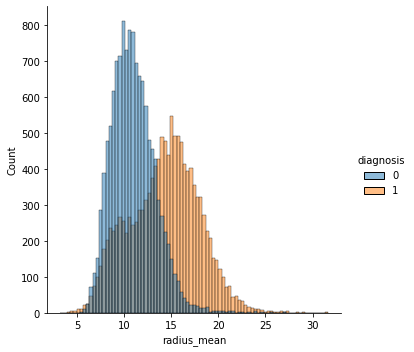

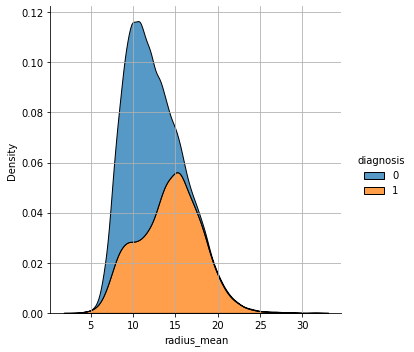

texture_mean


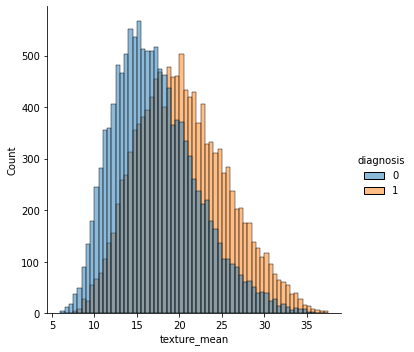

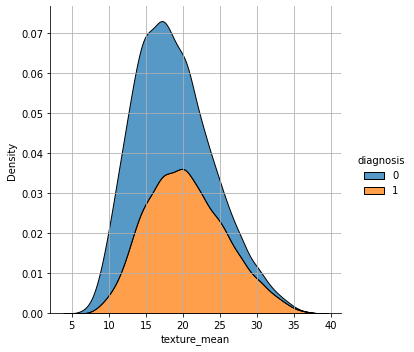

perimeter_mean


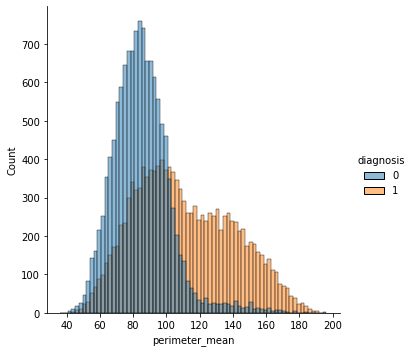

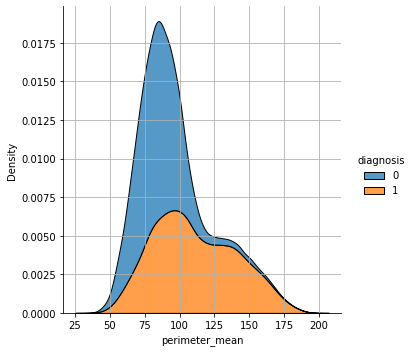

area_mean


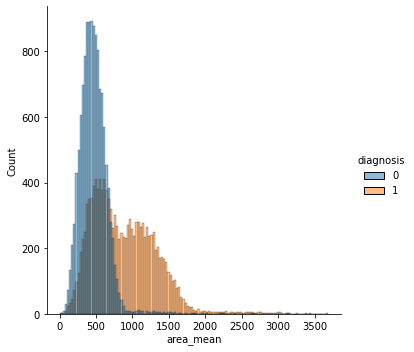

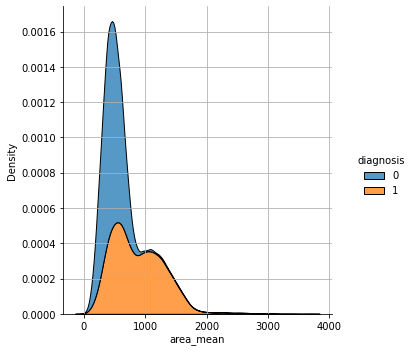

smoothness_mean


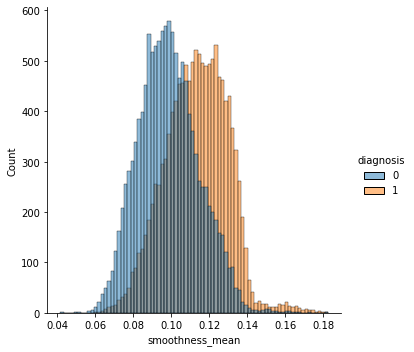

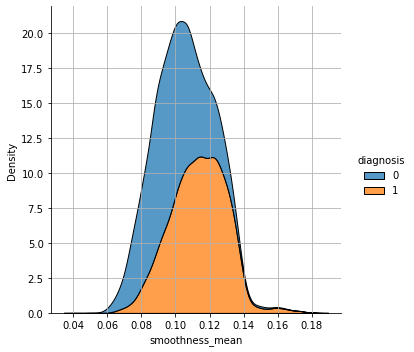

compactness_mean


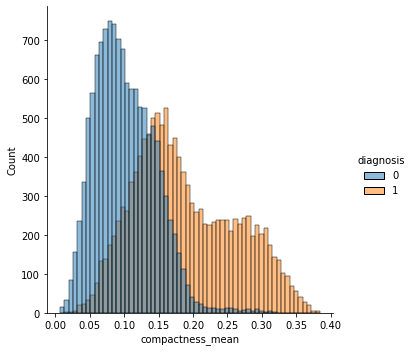

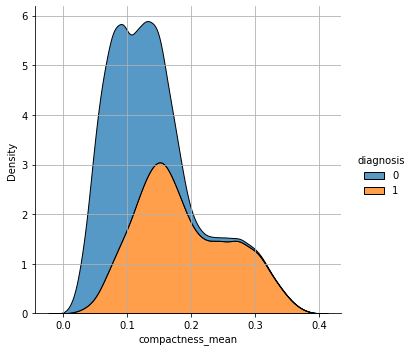

concavity_mean


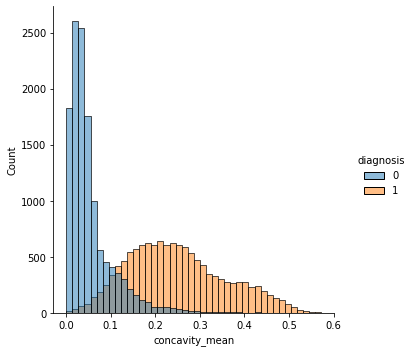

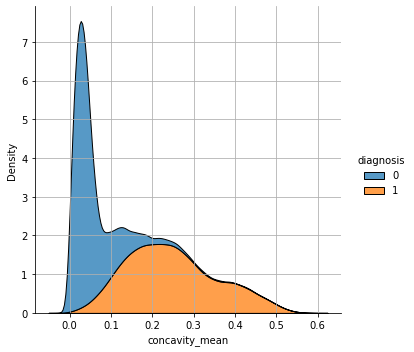

concave points_mean


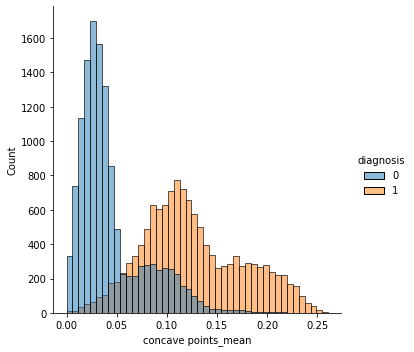

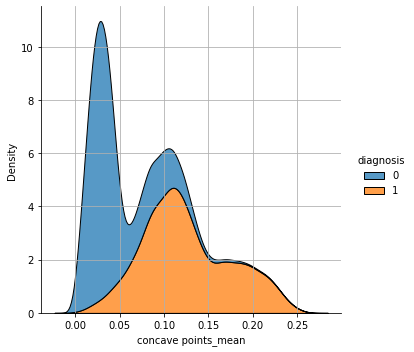

symmetry_mean


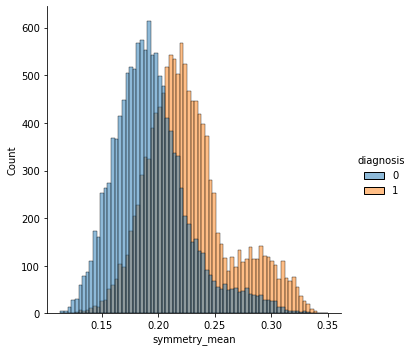

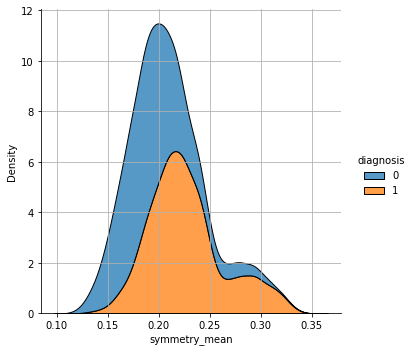

fractal_dimension_mean


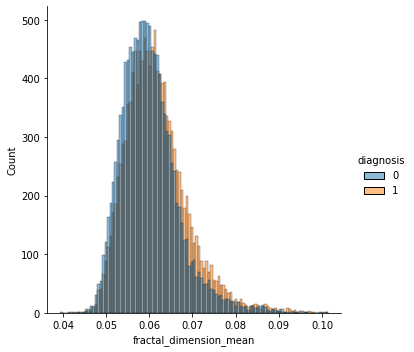

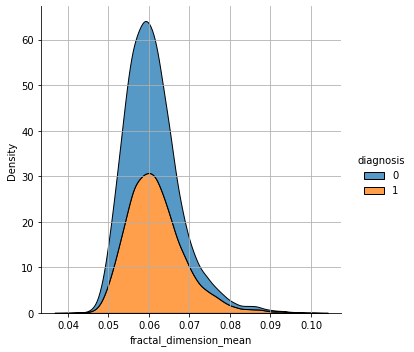

radius_se


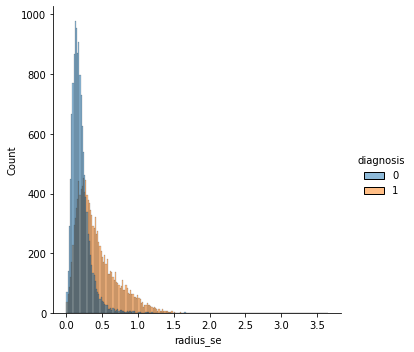

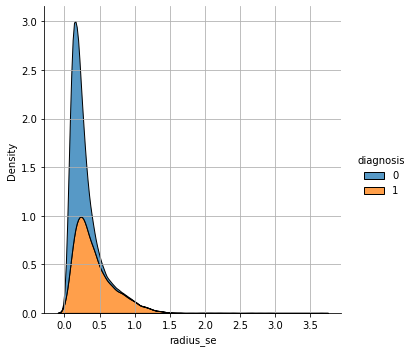

texture_se


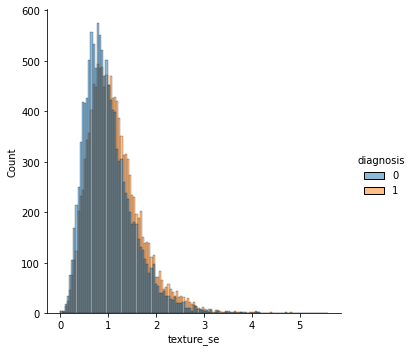

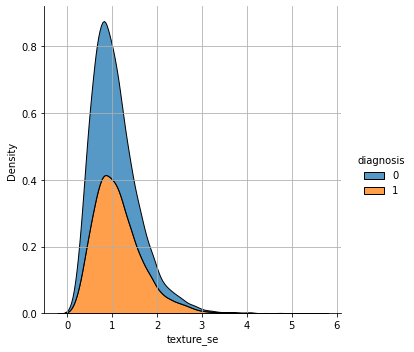

perimeter_se


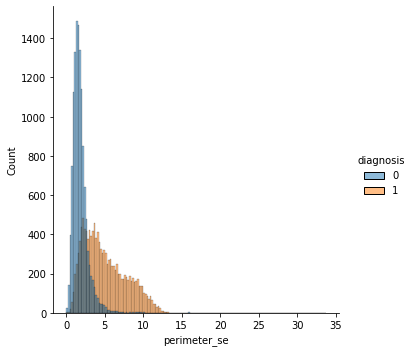

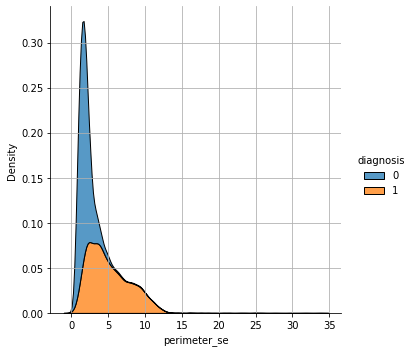

area_se


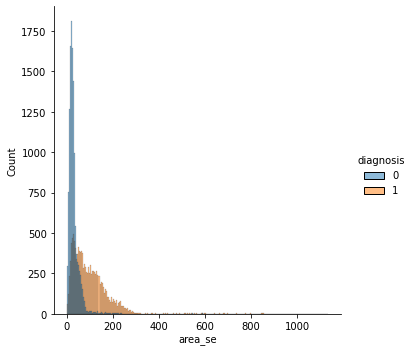

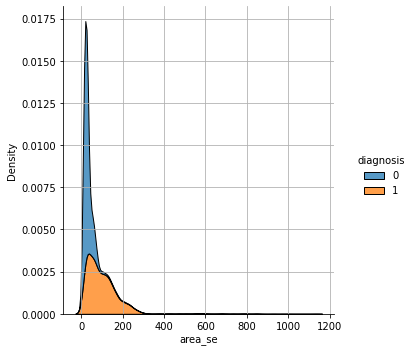

smoothness_se


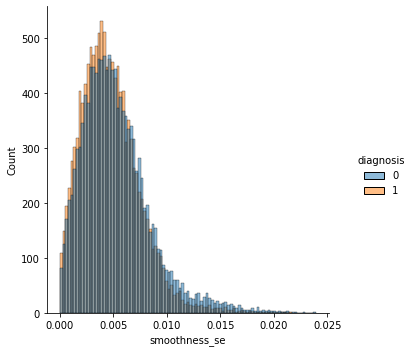

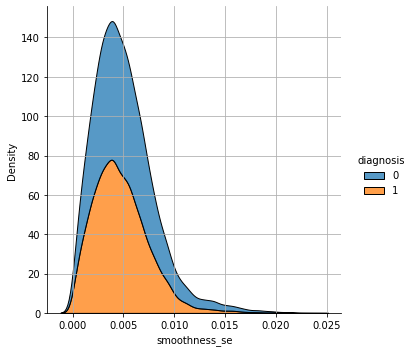

compactness_se


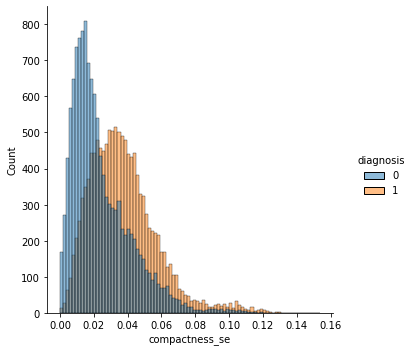

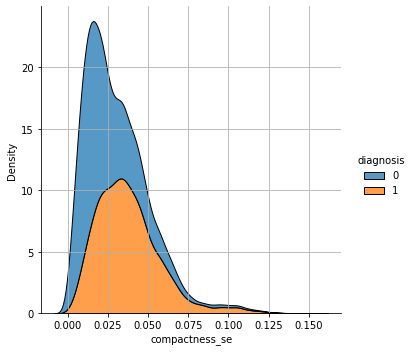

concavity_se


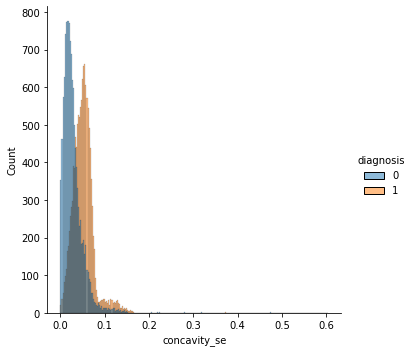

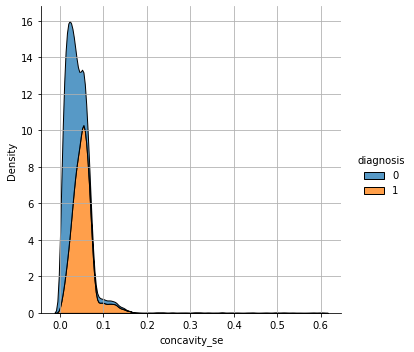

concave points_se


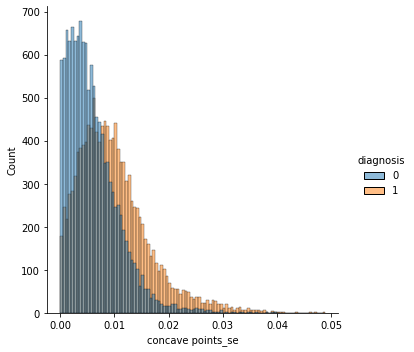

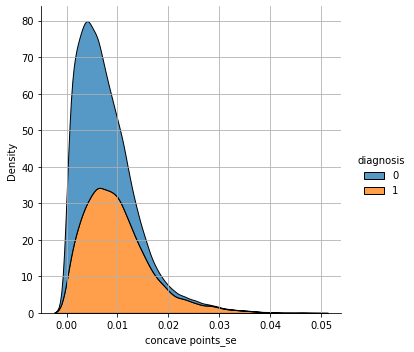

symmetry_se


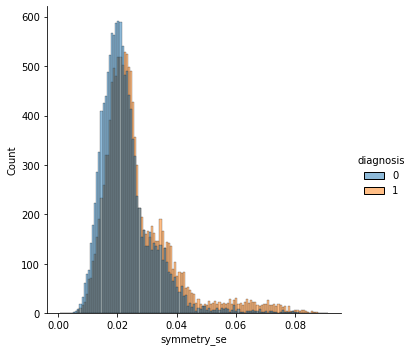

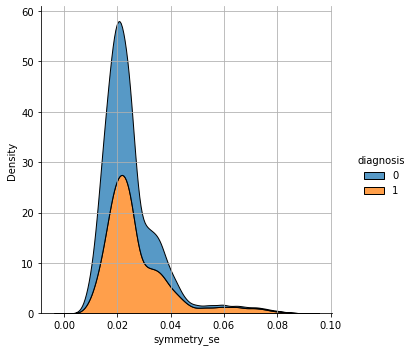

fractal_dimension_se


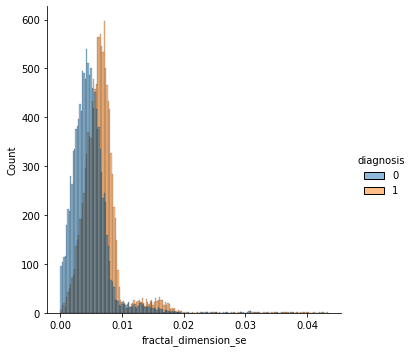

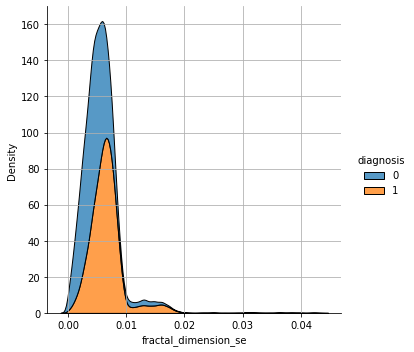

radius_worst


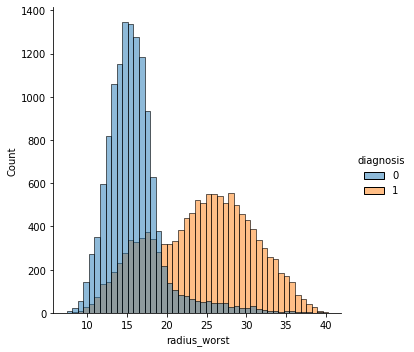

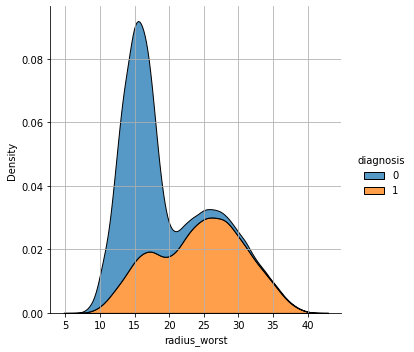

texture_worst


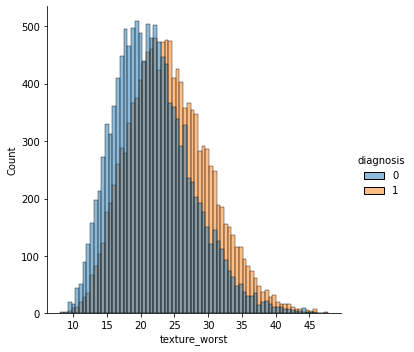

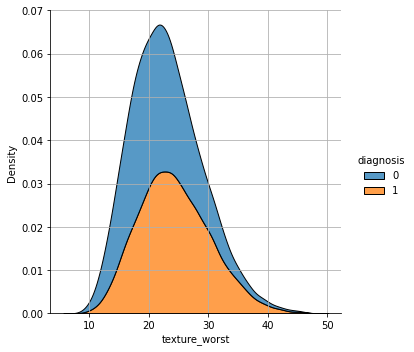

perimeter_worst


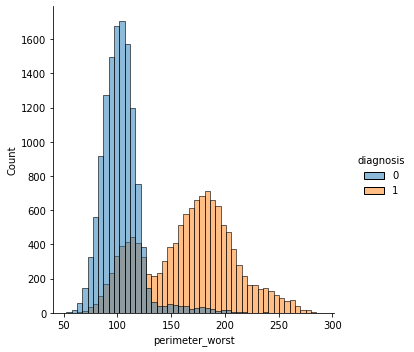

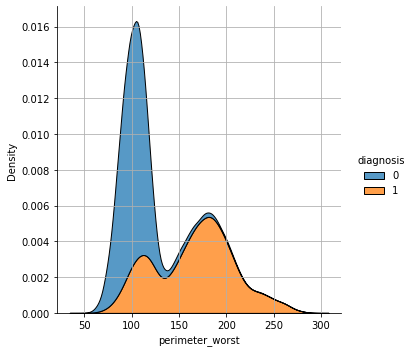

area_worst


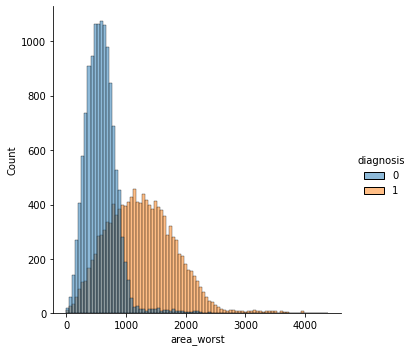

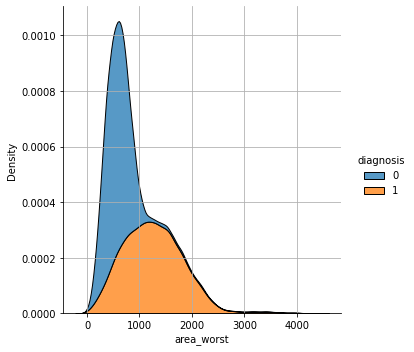

smoothness_worst


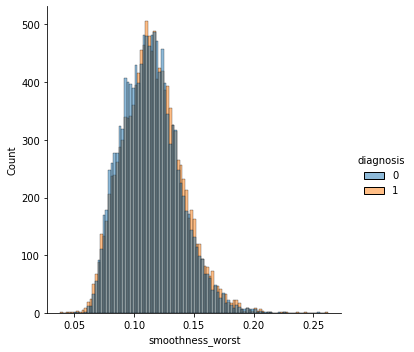

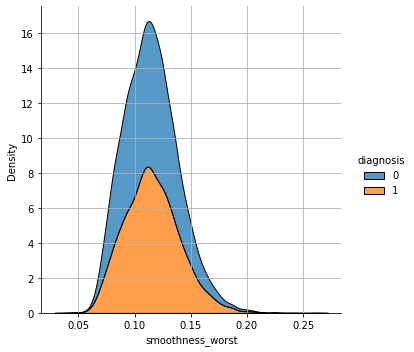

compactness_worst


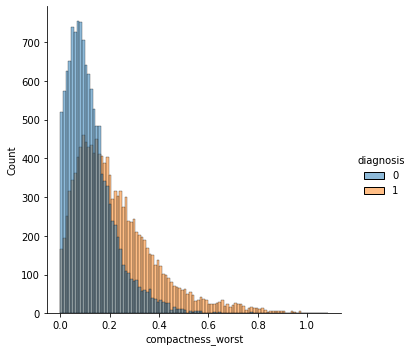

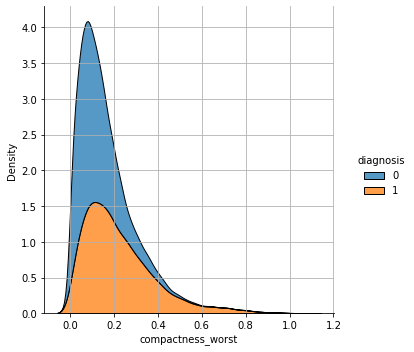

concavity_worst


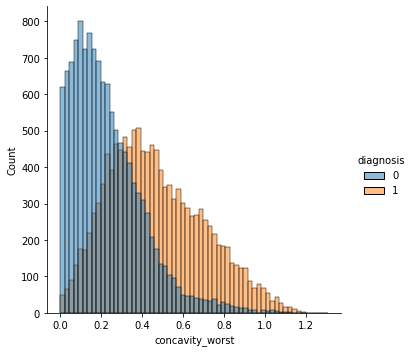

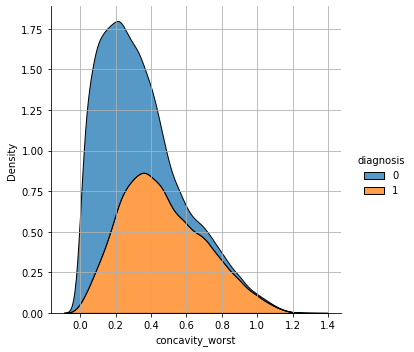

concave points_worst


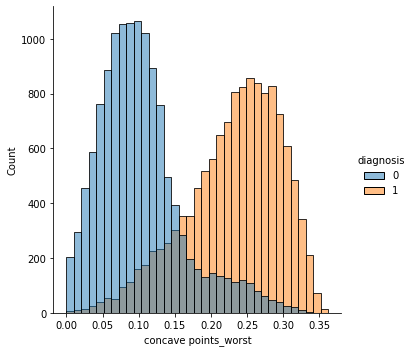

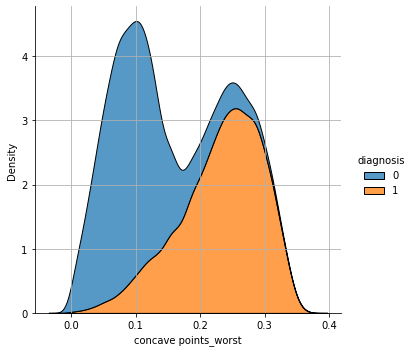

symmetry_worst


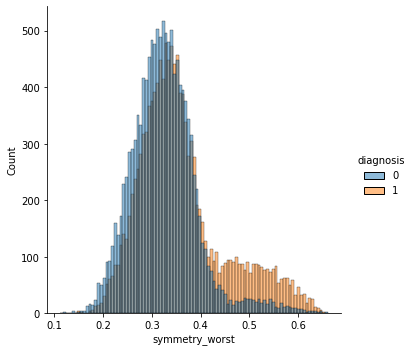

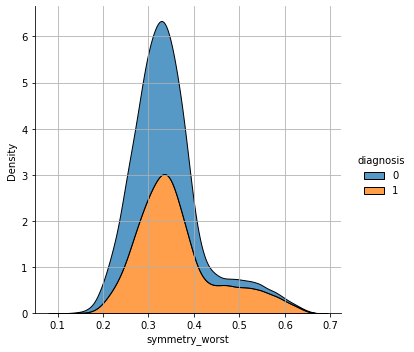

fractal_dimension_worst


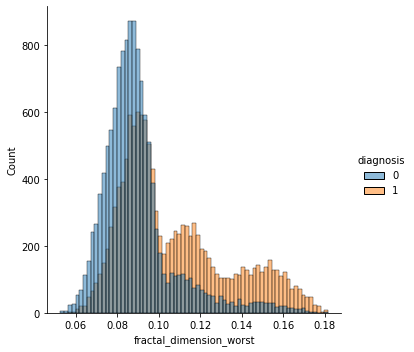

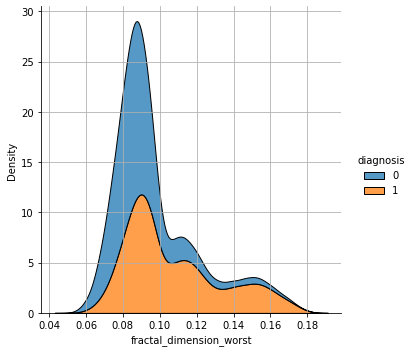

In [7]:
# Data Distribution 
for colm in data.select_dtypes(np.float_).columns:
    
    print(colm) 
    sns.displot(data, x = colm,  hue="diagnosis")
    sns.displot(data, x = colm,  hue="diagnosis", kind="kde", fill=True,  multiple="stack")
    plt.grid()
    plt.show()
    

<p style="text-align: justify "> 
Features like area_mean, concavity_mean, concave points_mean,  radius_se, texture_se, perimeter_se, area_se, concavity_se, concave points_se, fractal_dimension_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concave points_worst, fractal_dimension_worst are not distributed normally! <b>Importance of data distribution Explain</b>
</p>

### 3.3 Data Standardization

area_mean

Before Log Transformaton


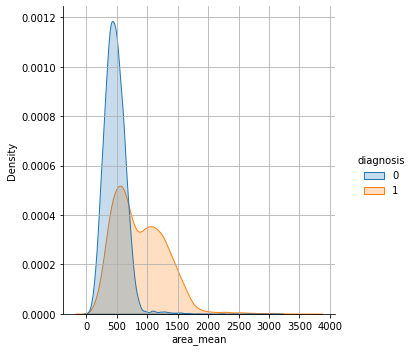

After Log Transformaton


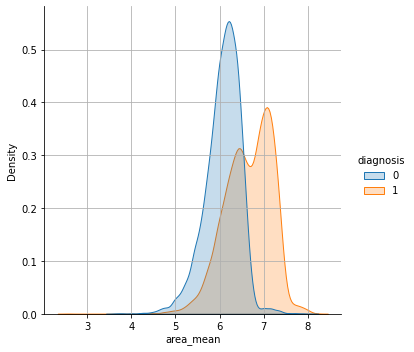

concavity_mean

Before Log Transformaton


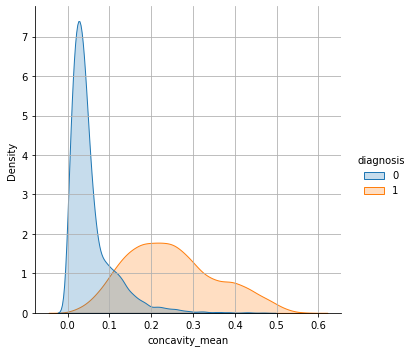

After Log Transformaton


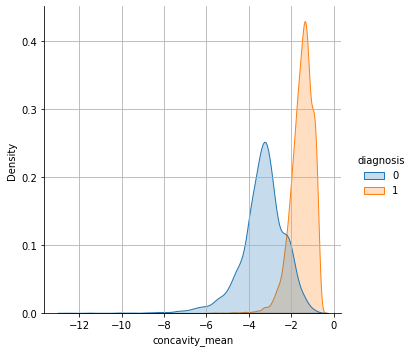

concave points_mean

Before Log Transformaton


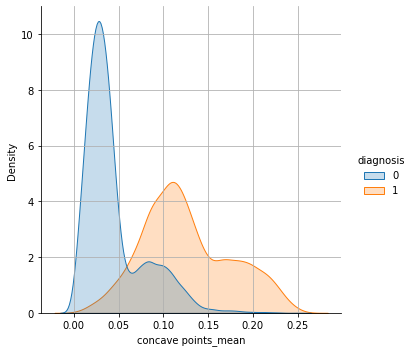

After Log Transformaton


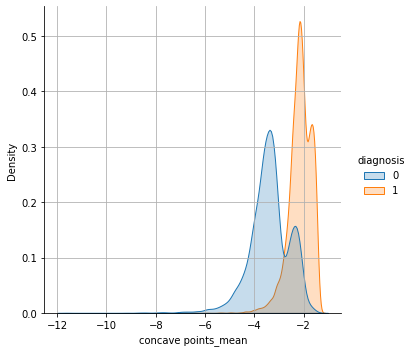

radius_se

Before Log Transformaton


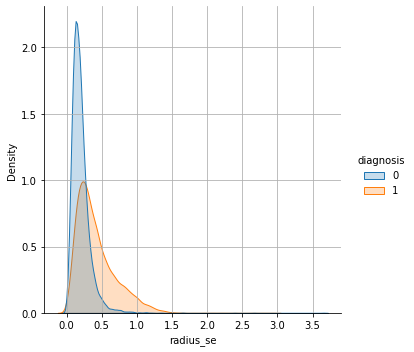

After Log Transformaton


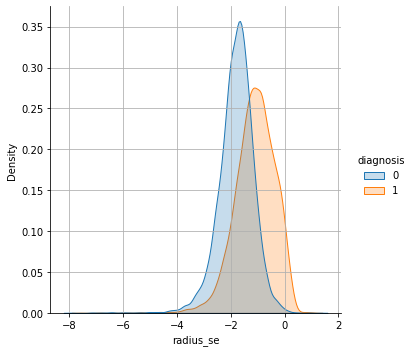

texture_se

Before Log Transformaton


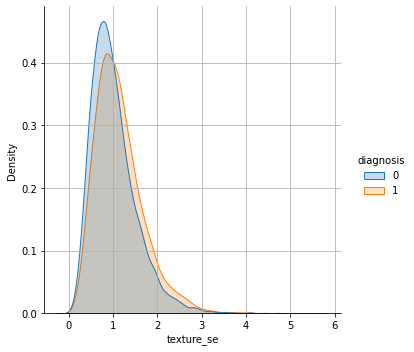

After Log Transformaton


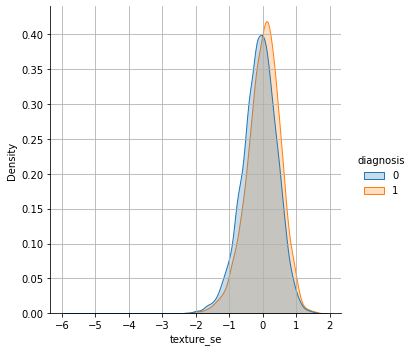

perimeter_se

Before Log Transformaton


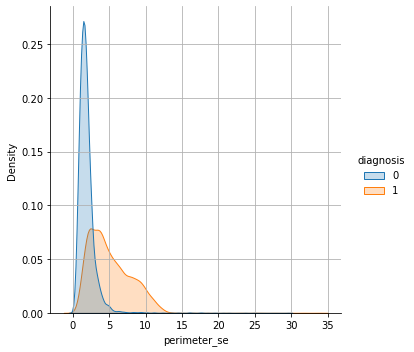

After Log Transformaton


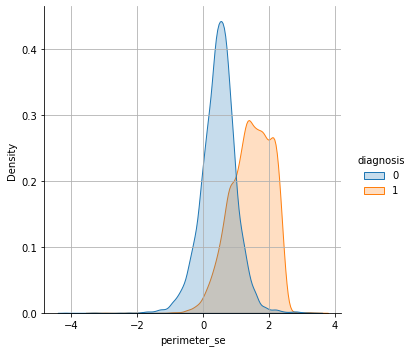

area_se

Before Log Transformaton


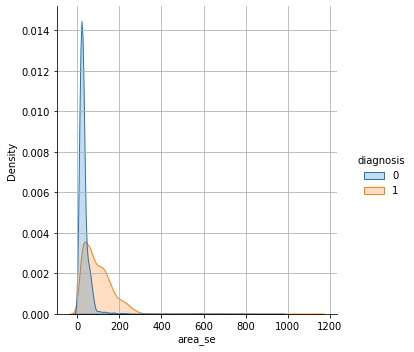

After Log Transformaton


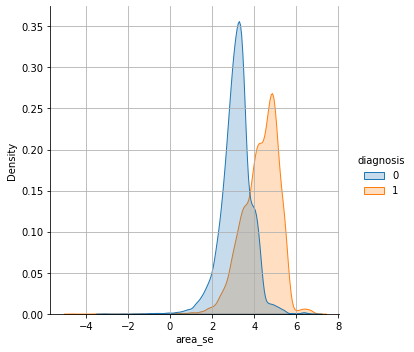

concavity_se

Before Log Transformaton


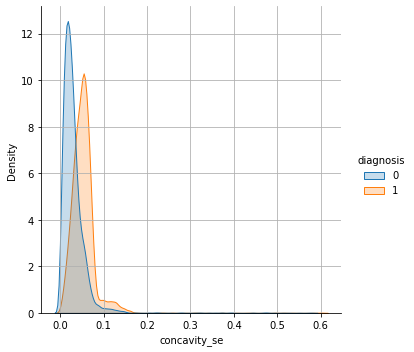

After Log Transformaton


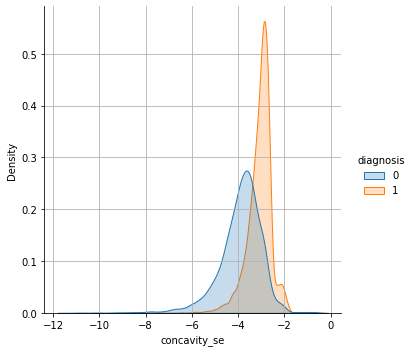

concave points_se

Before Log Transformaton


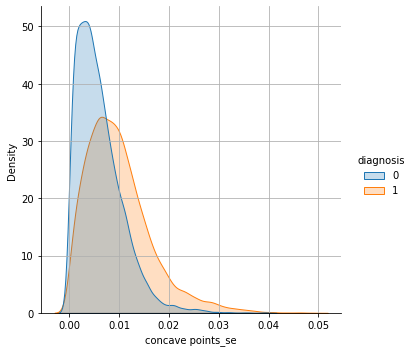

After Log Transformaton


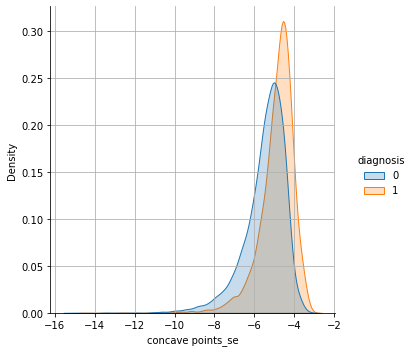

fractal_dimension_se

Before Log Transformaton


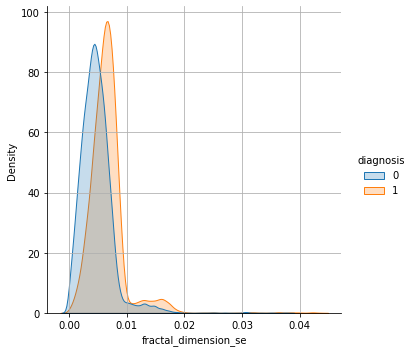

After Log Transformaton


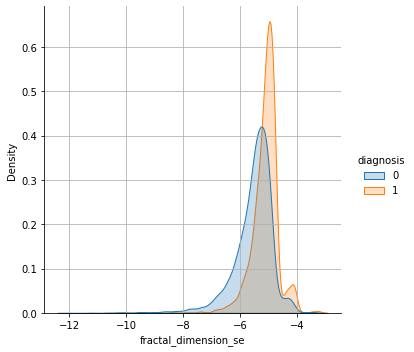

radius_worst

Before Log Transformaton


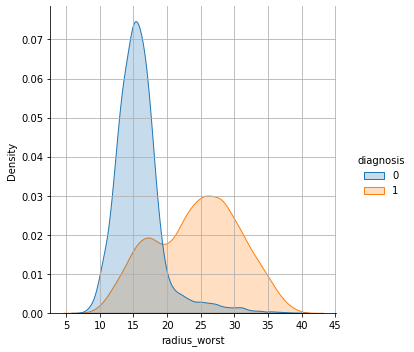

After Log Transformaton


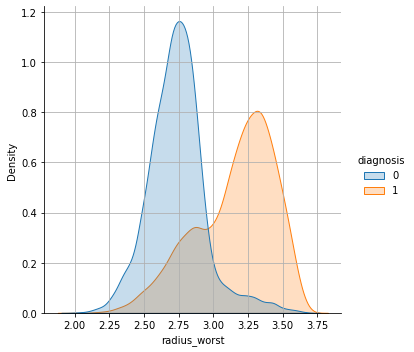

perimeter_worst

Before Log Transformaton


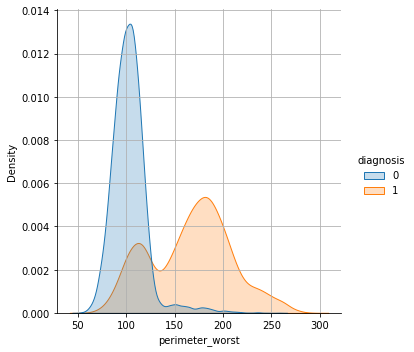

After Log Transformaton


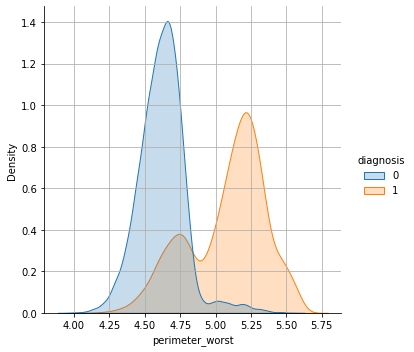

area_worst

Before Log Transformaton


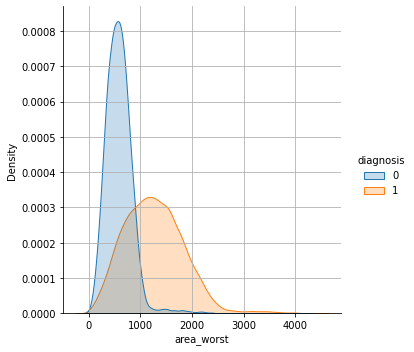

After Log Transformaton


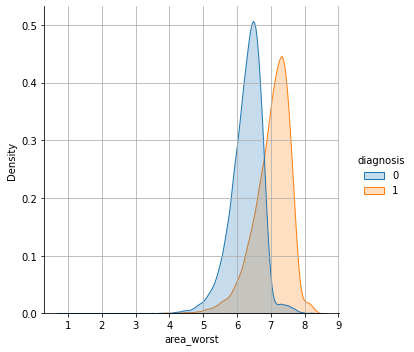

compactness_worst

Before Log Transformaton


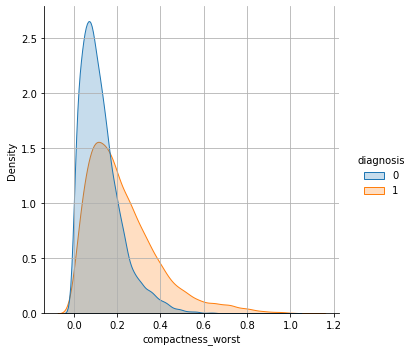

After Log Transformaton


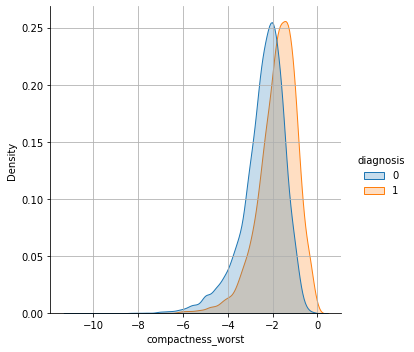

concave points_worst

Before Log Transformaton


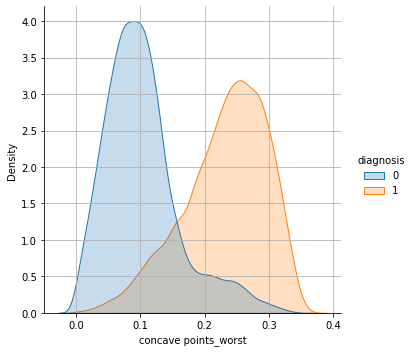

After Log Transformaton


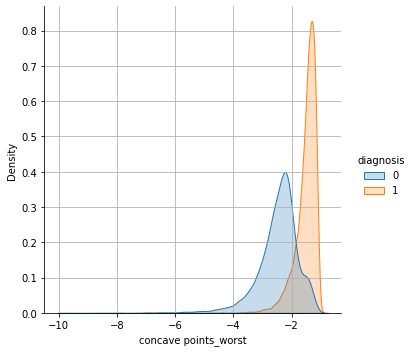

fractal_dimension_worst

Before Log Transformaton


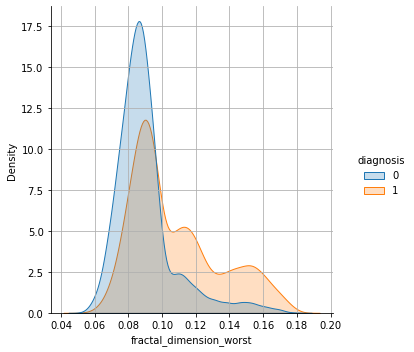

After Log Transformaton


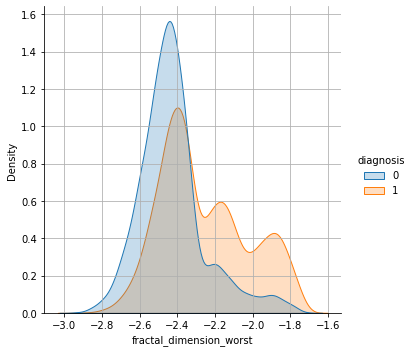

In [8]:
# Power Transform of the data 

from scipy.stats import boxcox 

features_to_transform = ["area_mean", "concavity_mean", "concave points_mean", "radius_se", "texture_se",
                         "perimeter_se", "area_se", "concavity_se", "concave points_se", "fractal_dimension_se", "radius_worst", 
                         "perimeter_worst", "area_worst", "compactness_worst", "concave points_worst", "fractal_dimension_worst" ]


for f in features_to_transform:
    
    print(f"{f}")
    print()
    print("Before Log Transformaton")
    sns.displot(data, x = f,  hue="diagnosis", kind="kde", fill=True , label = "before transformation")
    plt.grid()
    plt.show()
    
    
    data[f] = np.log(data[f].values)
    print("After Log Transformaton")
    sns.displot(data, x = f,  hue="diagnosis", kind="kde", fill=True, label = "before transformation")
    plt.grid()
    plt.show()

### 3.4 Handle Outliers

<p style="text-align: justify "> 
    <ol>
        <li>What is an Anomaly/Outlier? </li>
        <li>Why Care about Anomaly? </li>
        <li>Five Ways to detect Anomaly </li> 
            <ol>
                <li> Standard Deviation </li>
                <li> Boxplots </li>
                <li> DBScan Clustering </li>
                <li> Isolation Forest </li>
                <li> Robust Random Cut Forest </li>
            </ol>
    </ol>
</p>
(Badr, 2022)


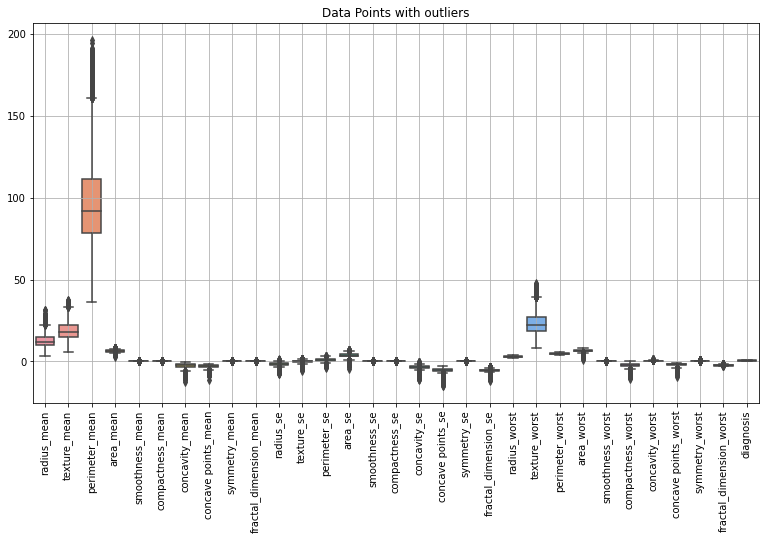

In [9]:
# Outlier Detection 
#Using Boxplot to display outliers present in the dataset

plt.figure(figsize=(13,7))
plt.title("Data Points with outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

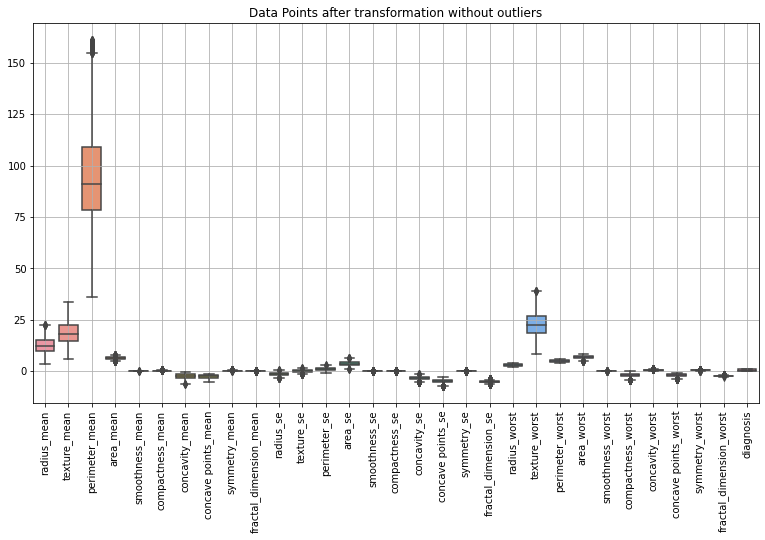

In [10]:
# Find the upper bound and lower bound for every feature 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];

#Using Boxplot to display outliers present in the dataset
plt.figure(figsize=(13,7))
plt.title("Data Points after transformation without outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### 3.5 Visualisation of Output Variable

0    7220
1    6687
Name: diagnosis, dtype: int64



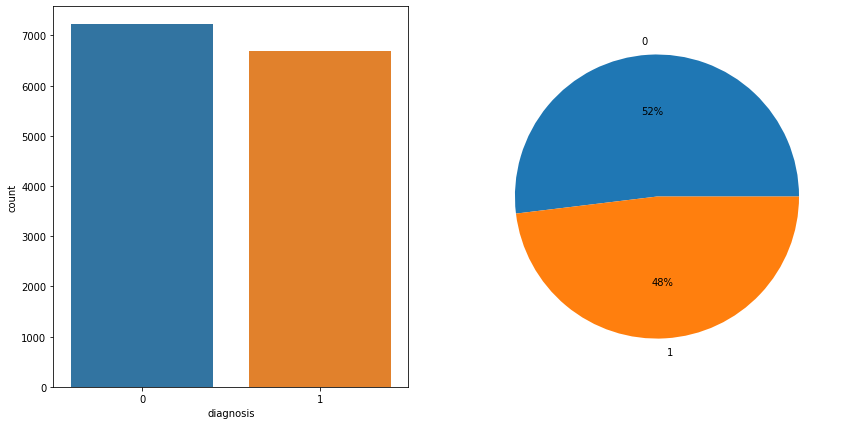

In [11]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

### 3.6 Balance Output Data  

<p style="text-align: justify "> 
After dealing with outliers, we can see that number of data points for class 0 is slightly more than class 1. To balance the data set, we will generate synthetic data. <b> Generate data Explain </b>
</p>

In [12]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(sampling_strategy= 1)

In [13]:
X , y = sampler.fit_resample(data.iloc[:,:-1].values , data.iloc[:,-1].values )

In [14]:
df = pd.DataFrame()
for i, fea in enumerate(data.iloc[:, :-1].columns):
    df[fea] = X[:, i]

df['diagnosis'] = y
data = df.copy()
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,10.302042,16.758441,97.568306,5.768424,0.129037,0.090188,-3.139866,-3.973989,0.226011,0.055626,...,25.704716,4.568040,5.390193,0.157770,-2.100805,0.022506,-2.208718,0.279209,-2.580302,0
1,8.045502,16.094636,78.540549,6.398021,0.077613,0.064573,-4.927970,-2.916258,0.186815,0.051772,...,22.345908,4.725165,6.704590,0.110365,-2.366014,0.411800,-2.567198,0.343249,-2.373025,0
2,6.892966,27.320674,155.892797,5.962459,0.116123,0.110978,-2.102740,-3.059030,0.301315,0.059410,...,22.585051,4.498423,7.238961,0.114831,-1.791497,0.198205,-1.713228,0.342547,-2.249856,1
3,9.148873,9.812381,77.633062,5.392252,0.107201,0.091145,-3.970016,-4.577198,0.180661,0.062188,...,14.888842,4.483572,5.929361,0.160798,-3.037499,0.081466,-2.945898,0.391160,-2.515834,0
4,8.765203,14.624680,77.328347,7.047549,0.092928,0.131232,-1.683376,-2.528733,0.186120,0.067075,...,16.555291,4.620966,6.407634,0.102006,-2.053204,0.379895,-1.213340,0.372551,-2.519682,0


0    7220
1    7220
Name: diagnosis, dtype: int64



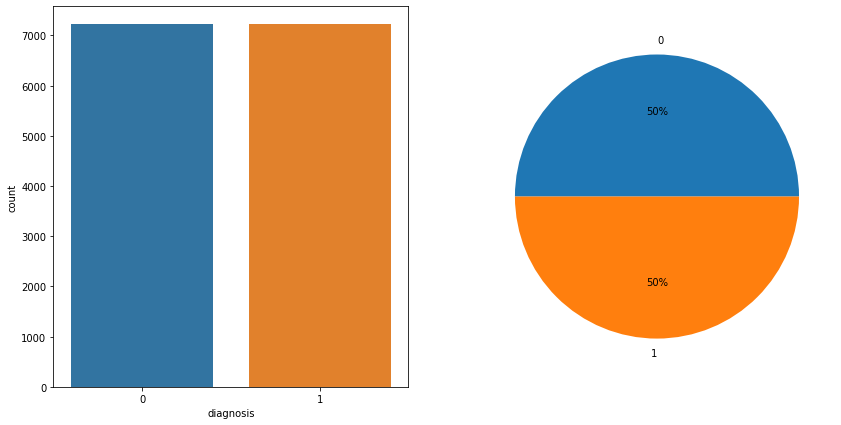

In [15]:
# Class distribution of Output/dependent feature

print( data['diagnosis'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'diagnosis' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['diagnosis'].value_counts() , labels= [0, 1], autopct='%.0f%%')

plt.show()

### 3.7 Corelation Matrix

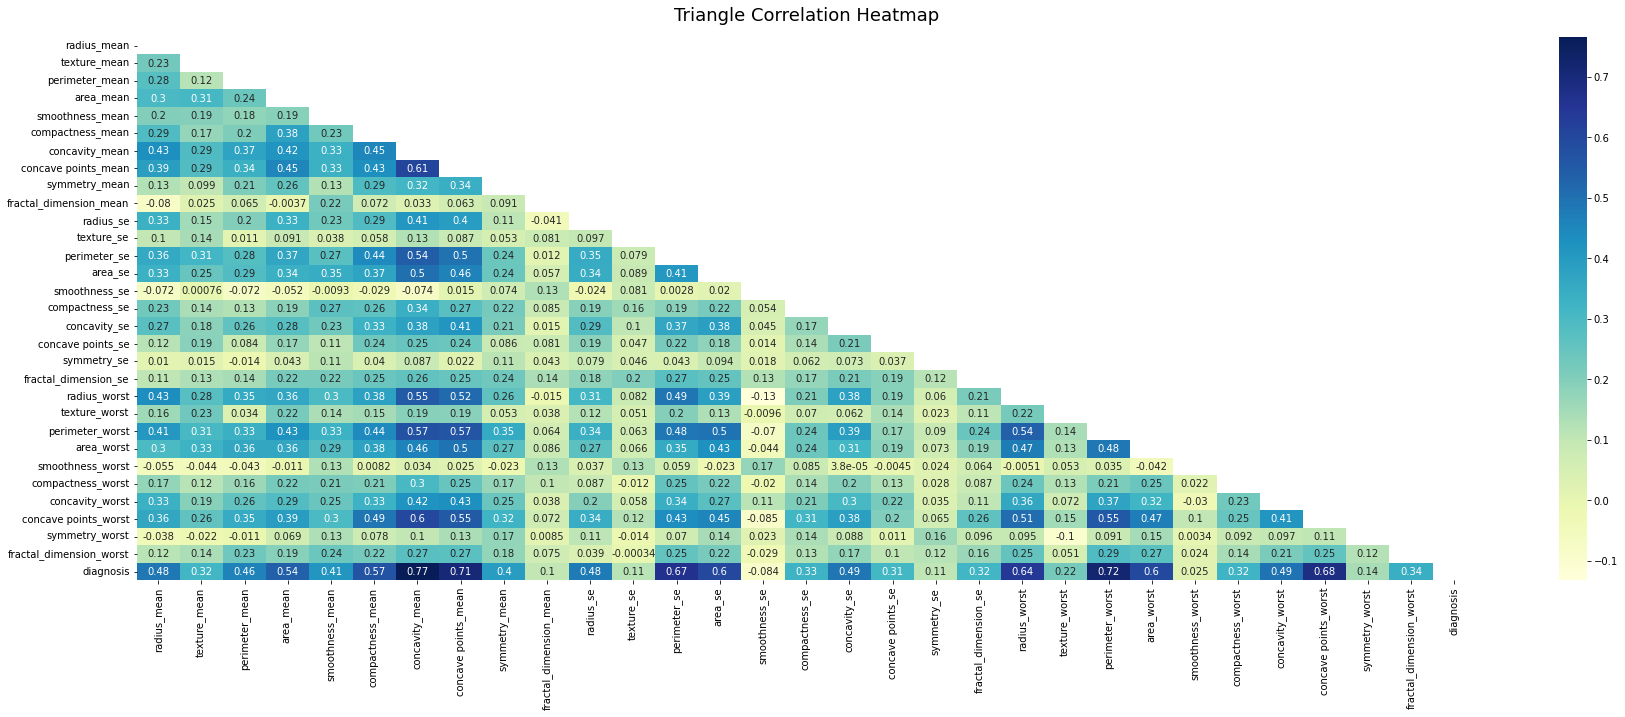

In [16]:
plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### 3.8 Feature Selection

In [17]:
# analiseing the feature importance using randome forest

fe_imp = RandomForestClassifier()
fe_imp.fit(data.iloc[:, :-1].values , data.iloc[:, -1].values)

for i, j in enumerate(fe_imp.feature_importances_):
    print(f"{i} :   {data.columns[i]}  has the { np.around(j , decimals= 5 )*100 } importance")

0 :   radius_mean  has the 2.037 importance
1 :   texture_mean  has the 0.244 importance
2 :   perimeter_mean  has the 1.585 importance
3 :   area_mean  has the 3.963 importance
4 :   smoothness_mean  has the 0.5950000000000001 importance
5 :   compactness_mean  has the 2.831 importance
6 :   concavity_mean  has the 19.162000000000003 importance
7 :   concave points_mean  has the 11.997 importance
8 :   symmetry_mean  has the 0.6669999999999999 importance
9 :   fractal_dimension_mean  has the 0.272 importance
10 :   radius_se  has the 1.3820000000000001 importance
11 :   texture_se  has the 0.22300000000000003 importance
12 :   perimeter_se  has the 7.651 importance
13 :   area_se  has the 3.8670000000000004 importance
14 :   smoothness_se  has the 0.31 importance
15 :   compactness_se  has the 0.358 importance
16 :   concavity_se  has the 2.02 importance
17 :   concave points_se  has the 0.414 importance
18 :   symmetry_se  has the 0.296 importance
19 :   fractal_dimension_se  has the

### 3.9 Feature Extraction 

In [18]:
pca = PCA(n_components= 10)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

DATA['Target'] = data.iloc[:, -1].values


DATA.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,Target
0,1.073501,0.426569,-3.614502,-2.353799,0.962838,0.075375,-0.083535,0.046750,-0.385404,-1.486957,0
1,-18.092249,-2.565658,-2.071591,-3.664893,1.473137,-0.062615,0.650375,-0.350936,1.838678,-0.245419,0
2,59.475840,1.542875,5.175343,-9.374271,0.894947,-1.105803,0.040251,-0.969649,-0.096905,1.062831,1
3,-19.204169,-11.916880,-2.691703,-0.851719,1.135753,0.361897,-0.691976,-0.230046,-0.271930,-0.521561,0
4,-19.263587,-7.560143,0.424646,-1.587012,-2.096026,-0.288384,-0.606667,-0.770388,-0.175448,0.702636,0


### 3.10 Split data 

In [19]:

X_train, X_test, y_train, y_test = train_test_split( DATA.iloc[:, :-1].values, 
                                                    DATA.iloc[:, -1].values, 
                                                    test_size=0.25)

### 3.11 Split data 

In [20]:
# DATA SCALING 

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4: Model Definition and Analysis

### 4.1 Define helper function 

In [21]:
# Collection of fpr and tpr for various models 
ROC_Values = dict()

def classification_Report(model ,y_pred, model_name):
    """
    input  : object of the model, predicted
    output : returns various metrics to understand model performance 
    """
    
    # sklearns classification report function
    print( classification_report(y_test ,y_pred) )
    
    # Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    hm = sns.heatmap((cf_matrix/np.sum(cf_matrix))*2 , annot=True, fmt='.2%', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
    hm.set_xlabel("Predicted Values", fontsize = 15)
    hm.set_ylabel("Actual Values", fontsize = 15)
    plt.show()
    
    
    # ROC curve 
    fpr, tpr, _  = roc_curve(y_test ,y_pred)
    
    if model_name not in ROC_Values.keys() :
        ROC_Values[model_name] = [fpr, tpr]
    
    

In [22]:
def model_Trainer(model_obj, model_name):
    """
    input:
        model_obj  : object of our model 
        model_name : string input 
    returns:
        Generates predictions and classification report
        trained model
    """
    model_obj.fit(X_train, y_train)
    
    y_pred = model_obj.predict(X_test)

    classification_Report(model_obj, y_pred ,model_name)
    
    return model_obj
    

### 4.2 Machine Learning Approaches

#### 1. Decision Tree (without hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1801
           1       0.95      0.94      0.94      1809

    accuracy                           0.94      3610
   macro avg       0.94      0.94      0.94      3610
weighted avg       0.94      0.94      0.94      3610



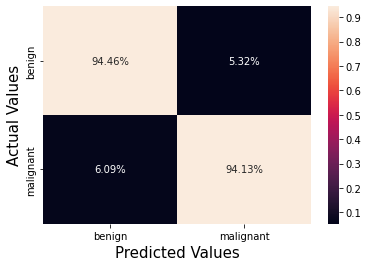

In [23]:
Decision_Tree = DecisionTreeClassifier()

Decision_Tree = model_Trainer(Decision_Tree , "Decision_Tree")

#### 2. Decision Tree (with hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1801
           1       0.94      0.93      0.93      1809

    accuracy                           0.93      3610
   macro avg       0.93      0.93      0.93      3610
weighted avg       0.93      0.93      0.93      3610



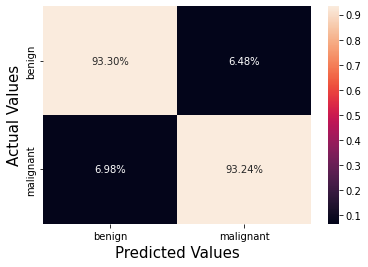



Tuned Parameters are: {'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 5, 'min_impurity_decrease': 0, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy'}


In [24]:
# 
criterion = ["gini", "entropy"]

# Nu
splitter = ["best", "random"]

# Maximum number of levels in tree
max_depth = [i for i in range(2, 20, 1) ]

# Minimum number of samples required to split a node
min_samples_split = [i for i in range(2, 20, 1) ]

# Minimum number of samples required at each leaf node
min_samples_leaf = [ i for i in range(2, 20, 1) ]

# The number of features to consider when looking for the best split:
max_features = ["auto", "sqrt", "log2"]

# 
min_impurity_decrease = [0, 0.1, 0.01]
                    
    
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'min_impurity_decrease':min_impurity_decrease}



Decision_Tree_Tuned = RandomizedSearchCV(estimator = DecisionTreeClassifier(), 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3,  
                               n_jobs = -1)



# Train, find best parameters and then generate classification report
Decision_Tree_Tuned = model_Trainer(Decision_Tree_Tuned, "Decision_Tree_Tuned")


# Look up of best parameters 
print()
print()
print(f"Tuned Parameters are: {Decision_Tree_Tuned.best_params_}")


#### 3. Random Forest (without hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1801
           1       0.97      0.98      0.97      1809

    accuracy                           0.97      3610
   macro avg       0.97      0.97      0.97      3610
weighted avg       0.97      0.97      0.97      3610



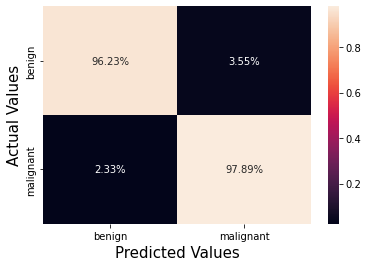

In [25]:
# Create a object of model
Random_Forest = RandomForestClassifier()

# Train the model and generate report
Decision_Tree_Tuned = model_Trainer(Random_Forest, "Random_Forest")

#### 4. Random Forest (with hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1801
           1       0.96      0.98      0.97      1809

    accuracy                           0.97      3610
   macro avg       0.97      0.97      0.97      3610
weighted avg       0.97      0.97      0.97      3610



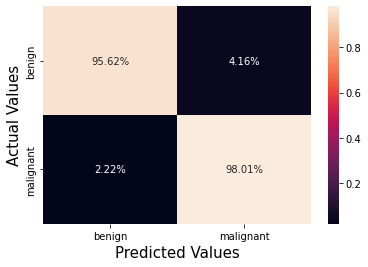



Tuned Parameters are: {'n_estimators': 1900, 'min_samples_split': 16, 'min_samples_leaf': 2, 'min_impurity_decrease': 0, 'max_features': 'sqrt', 'max_depth': 17, 'criterion': 'gini', 'class_weight': 'balanced'}


In [26]:
# number of estimers
n_estimators = [i for i in range(100,2000, 200)]

# splitting criteria
criterion = ["gini", "entropy"]

# Maximum number of levels in tree
max_depth = [i for i in range(2, 20, 1) ]

# Minimum number of samples required to split a node
min_samples_split = [i for i in range(2, 20, 1) ]

# Minimum number of samples required at each leaf node
min_samples_leaf = [ i for i in range(2, 20, 1) ]

# The number of features to consider when looking for the best split:
max_features = ["auto", "sqrt", "log2"]

#
min_impurity_decrease = [0, 0.1, 0.01]
                    
class_weight = ["balanced", "balanced_subsample"]

random_grid = { "n_estimators" : n_estimators,
                "criterion" : criterion,
                "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "max_features" : max_features,
                "min_impurity_decrease" : min_impurity_decrease,
                "class_weight" : class_weight
              }

Random_Forest_Tuned = RandomizedSearchCV(estimator = RandomForestClassifier(bootstrap = True, oob_score = True), 
                                         param_distributions = random_grid, 
                                         n_iter = 100,
                                         cv = 3, 
                                         n_jobs =  -1)



# Train, find best parameters and then generate classification report
Random_Forest_Tuned = model_Trainer(Random_Forest_Tuned, "Random_Forest_Tuned")


# Look up of best parameters 
print()
print()
print(f"Tuned Parameters are: {Random_Forest_Tuned.best_params_}")


#### 5. SVM (without hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1801
           1       0.97      0.97      0.97      1809

    accuracy                           0.97      3610
   macro avg       0.97      0.97      0.97      3610
weighted avg       0.97      0.97      0.97      3610



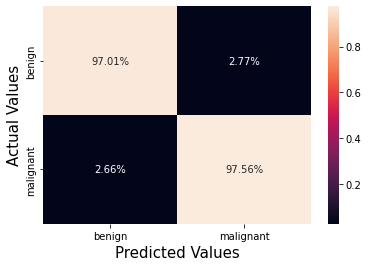

In [27]:
svm_classifier = SVC(probability=True)

# Train the model and generate report
svm_classifier = model_Trainer(svm_classifier, "svm_classifier")

#### 6. SVM (with hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1801
           1       0.97      0.98      0.98      1809

    accuracy                           0.98      3610
   macro avg       0.98      0.98      0.98      3610
weighted avg       0.98      0.98      0.98      3610



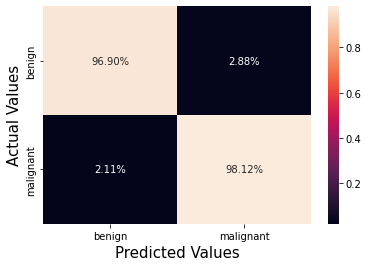



Tuned Parameters are: {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}


In [28]:
#Tuning Hyper Parameters using Gaussian kernel 

# defining parameter range

random_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_classifier_tuned_Gaussian_kernel = RandomizedSearchCV(estimator = SVC(probability=True), 
                                                          param_distributions = random_grid, 
                                                          n_iter = 100, 
                                                          cv = 3, n_jobs = -1)


# Train, find best parameters and then generate classification report
svm_classifier_tuned_Gaussian_kernel = model_Trainer( svm_classifier_tuned_Gaussian_kernel, "svm_classifier_tuned_Gaussian_kernel")


# Look up of best parameters 
print()
print()
print(f"Tuned Parameters are: {svm_classifier_tuned_Gaussian_kernel.best_params_}")


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1801
           1       0.97      0.98      0.97      1809

    accuracy                           0.97      3610
   macro avg       0.97      0.97      0.97      3610
weighted avg       0.97      0.97      0.97      3610



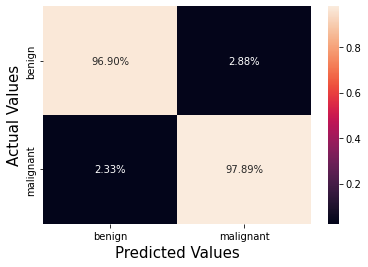



Tuned Parameters are: {'kernel': 'poly', 'degree': 2, 'coef0': 0.8, 'C': 0.1}


In [29]:
#Tuning Hyper Parameters using Polynomial Kernel

# defining parameter range

param_grid = {'C': [0.1, 1, 10, 100, 20,5], 
            'degree': [3,5,2] , 
            'coef0' : [0.01 ,  0.2, 0.8],
            'kernel': ['poly']}
 
svm_classifier_tuned_Poly_kernel = RandomizedSearchCV(estimator = SVC(probability=True),
                                                      param_distributions = param_grid, 
                                                      n_iter = 100, 
                                                      cv = 3, 
                                                      random_state=42, 
                                                      n_jobs = -1)


# Train, find best parameters and then generate classification report
svm_classifier_tuned_Poly_kernel = model_Trainer( svm_classifier_tuned_Poly_kernel, "svm_classifier_tuned_Poly_kernel")


# Look up of best parameters 
print()
print()
print(f"Tuned Parameters are: {svm_classifier_tuned_Poly_kernel.best_params_}")


#### 7. AdaBoost (without hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1801
           1       0.96      0.97      0.97      1809

    accuracy                           0.97      3610
   macro avg       0.97      0.97      0.97      3610
weighted avg       0.97      0.97      0.97      3610



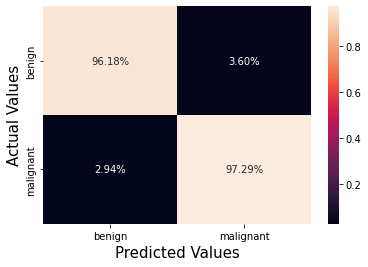

In [30]:
AdaBoost_Classifier = AdaBoostClassifier()

AdaBoost_Classifier = model_Trainer(AdaBoost_Classifier, "AdaBoost_Classifier")

#### 8. AdaBoost (with hyperparameter tuning)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1801
           1       0.97      0.97      0.97      1809

    accuracy                           0.97      3610
   macro avg       0.97      0.97      0.97      3610
weighted avg       0.97      0.97      0.97      3610



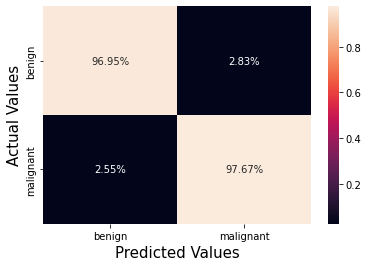



Tuned Parameters are: {'n_estimators': 900, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}


In [31]:

param_grid = {
              "n_estimators" : [i for i in range(50, 1000, 50)],
              "learning_rate" : [1, 0.01, 0.1],
              "algorithm" : ['SAMME', 'SAMME.R']
             }
 
AdaBoost_Classifier_tuned = RandomizedSearchCV(estimator = AdaBoostClassifier(),
                                               param_distributions = param_grid, 
                                               n_iter = 100, 
                                               cv = 3, 
                                               random_state=42, 
                                               n_jobs = -1)


# Train, find best parameters and then generate classification report
AdaBoost_Classifier_tuned = model_Trainer( AdaBoost_Classifier_tuned, "AdaBoost_Classifier_tuned")


# Look up of best parameters 
print()
print()
print(f"Tuned Parameters are: {AdaBoost_Classifier_tuned.best_params_}")


# Model Comparison

In [32]:
for i in ROC_Values.keys():
    print(i)

Decision_Tree
Decision_Tree_Tuned
Random_Forest
Random_Forest_Tuned
svm_classifier
svm_classifier_tuned_Gaussian_kernel
svm_classifier_tuned_Poly_kernel
AdaBoost_Classifier
AdaBoost_Classifier_tuned


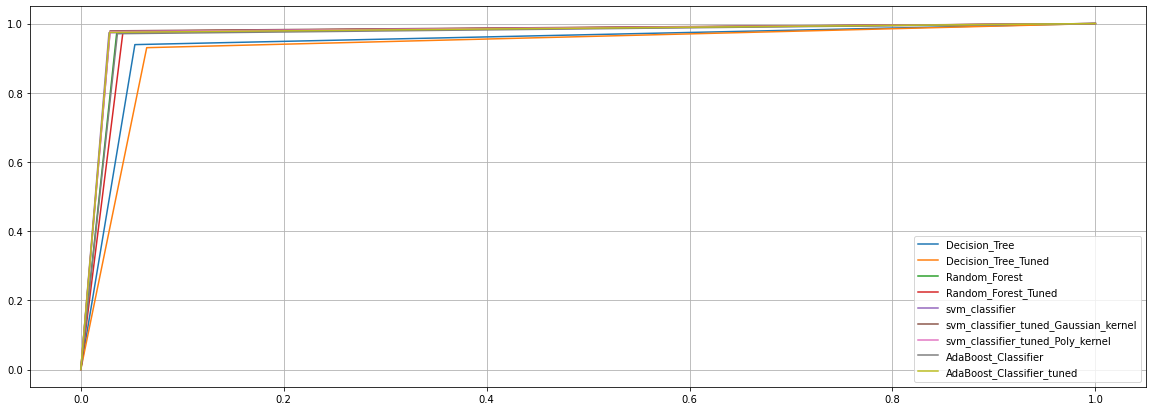

In [33]:
plt.figure(figsize= (20,7))

for i in ROC_Values.keys():
    plt.plot(ROC_Values[i][0], ROC_Values[i][1], label= i)
    plt.legend()

plt.grid()
plt.show()

### 4.3 deep Learning Approaches

In [44]:
import torch
import torch.nn as nn

In [95]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float().reshape(-1,1)

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float().reshape(-1,1)

In [96]:
def aNNmodel():
    
    # model architecture
    ANNclassifier = nn.Sequential(
        nn.Linear(torch.tensor(X_train).shape[1] , 16), # Input Layer
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(16, 32),                              # Dense Layer 1
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(32, 64),                              # Dense Layer 2
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(64, 32),                              # Dense Layer 3
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(32, 16),                              # DEnse LAyer 4
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(16, 8),                               # Dense Layer 5
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(8,1),                                 # Dense Layer 6
        nn.LeakyReLU(),                                 # activation unit
        nn.Linear(1,1)                                  # Output Layer
    )
    
    # Loss Function
    lossfun = nn.BCEWithLogitsLoss()
    
    # Optimizer
    optimizer = torch.optim.Adamax(ANNclassifier.parameters())
    
    return ANNclassifier, lossfun, optimizer
        


In [101]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(X_train)

    # compute loss
    loss = lossfun(yHat,y_train)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  
  
  # final forward pass
  predictions = ANNmodel(X_train)
    
  # compute the predictions and report accuracy
  # NOTE: Wasn't this ">0" previously?!?!
  totalacc = 100*torch.mean(((predictions>.5) == y_train).float())
  
  return losses,predictions, totalacc

In [102]:
# create everything
ANNclassify,lossfun,optimizer = aNNmodel()

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)



Final accuracy: 96.1404%


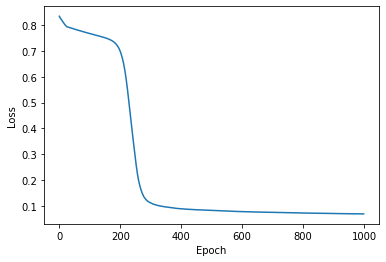

In [105]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach())
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [ ]:
classification_Report(ANNclassify ,y_pred, model_name)

In [108]:
ANNclassify(X_test).detach().numpy()

array([[-5.670889 ],
       [-5.6906986],
       [-0.3136329],
       ...,
       [ 2.9717624],
       [-1.05357  ],
       [-7.622262 ]], dtype=float32)

### 4.4 Analysis

# Save Best Model

In [34]:
if True: 
    Pkl_Filename = "best__model.pkl"  

    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(svm_classifier_tuned_Poly_kernel, file) 

if False:
    # Load the Model back from file
    with open('best_model.pkl', 'rb') as file:  
        model = pickle.load(file)

# Step 6: Generate Predictions 

In [37]:
# Load the test data points 

df = pd.read_csv("Dataset/test_100r.csv")
Id = df.iloc[:, 0].values.astype(np.int32)
df.drop( labels= ['id'], axis= 1, inplace= True )
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.914462,10.399366,68.532774,195.624827,0.078282,0.133505,0.030642,0.025076,0.199481,0.054877,...,12.483659,11.961359,85.471488,148.016468,0.087666,0.046050,0.289351,0.038040,0.349355,0.074248
1,7.107375,15.895246,93.288227,450.381515,0.100320,0.045394,0.018209,0.010265,0.178165,0.057009,...,17.676051,20.864080,100.798972,817.094638,0.075030,0.180301,0.492751,0.096460,0.395112,0.098559
2,11.575929,20.435897,108.126199,1316.008018,0.109270,0.345116,0.412742,0.165474,0.215813,0.059694,...,13.035890,19.029690,108.220078,1145.478120,0.082662,0.037770,0.424392,0.219969,0.503064,0.093896
3,17.049499,17.189036,122.326677,1042.768588,0.134032,0.093098,0.070388,0.078683,0.244361,0.066792,...,16.751836,24.928188,91.684245,947.978048,0.103626,0.631425,0.252219,0.032718,0.268289,0.082652
4,10.815883,16.936336,91.779285,1117.781440,0.110550,0.203851,0.318877,0.050364,0.232977,0.058317,...,16.795885,20.591944,114.458955,683.021463,0.181860,0.170216,0.508757,0.161784,0.574045,0.091577


In [38]:
Id

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0], dtype=int32)

In [39]:
df = df.dropna()

In [40]:
# Data Standardization

for f in features_to_transform:
    df[f] = np.log(df[f].values)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,11.914462,10.399366,68.532774,5.276199,0.078282,0.133505,-3.485397,-3.685843,0.199481,0.054877,...,2.524420,11.961359,4.448183,4.997324,0.087666,-3.078030,0.289351,-3.269126,0.349355,-2.600339
1,7.107375,15.895246,93.288227,6.110095,0.100320,0.045394,-4.005821,-4.579031,0.178165,0.057009,...,2.872211,20.864080,4.613128,6.705755,0.075030,-1.713126,0.492751,-2.338623,0.395112,-2.317098
2,11.575929,20.435897,108.126199,7.182358,0.109270,0.345116,-0.884933,-1.798942,0.215813,0.059694,...,2.567706,19.029690,4.684167,7.043577,0.082662,-3.276245,0.424392,-1.514267,0.503064,-2.365567
3,17.049499,17.189036,122.326677,6.949635,0.134032,0.093098,-2.653737,-2.542331,0.244361,0.066792,...,2.818508,24.928188,4.518351,6.854331,0.103626,-0.459776,0.252219,-3.419824,0.268289,-2.493117
4,10.815883,16.936336,91.779285,7.019101,0.110550,0.203851,-1.142950,-2.988470,0.232977,0.058317,...,2.821134,20.591944,4.740216,6.526526,0.181860,-1.770687,0.508757,-1.821495,0.574045,-2.390578


In [41]:
# PCA

most_valued_data_points = pca.transform(df.iloc[:, :].values)
df = pd.DataFrame(data = most_valued_data_points , columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-28.184601,-13.201840,-0.028973,2.384750,1.121695,0.391259,-0.536128,-0.646835,-0.300458,-1.002998
1,-3.436119,-4.527403,-1.827340,-5.083428,1.827679,-1.148279,0.966239,-0.075748,-0.985597,-0.048875
2,11.801567,-2.748638,3.346637,-1.135409,-1.298544,1.128526,0.385486,-1.471141,0.036443,0.499502
3,26.134675,0.617050,-2.501013,3.631565,0.381925,-0.813569,-0.435618,1.719577,0.410991,-1.000721
4,-4.657885,-3.130647,-0.166544,-0.892774,-1.030077,-0.827420,0.454168,-1.805935,0.263833,0.241439


In [42]:
df = scalar.transform(df)

In [43]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['id'] = Id

res['diagnosis'] = pd.DataFrame(  AdaBoost_Classifier_tuned.predict_proba(df)[:, 1]  )
res = res.dropna()
# Save the csv file with name as "results" and file extention ".csv"
res.to_csv( 'AdaBoost_Classifier_tuned.csv' , index = False)

# References

<ol>
    <li> Badr, W., 2022. 5 Ways to Detect Outliers That Every Data Scientist Should Know (Python Code). [online] Medium. Available at: <a href = https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623>  link </a>  [Accessed 1 March 2022]. </li>
</ol>

These(see below bullets) three are quite similar but with a subtle differences-:(concise and easy to remember)

feature extraction and feature engineering: transformation of raw data into features suitable for modeling;

feature transformation: transformation of data to improve the accuracy of the algorithm;

feature selection: removing unnecessary features.

Just to add an Example of the same,

Feature Extraction and Engineering(we can extract something from them)

Texts(ngrams, word2vec, tf-idf etc)
Images(CNN'S, texts, q&a)
Geospatial data(lat, long etc)
Date and time(day, month, week, year, rolling based)
Time series, web, etc
Dimensional Reduction Techniques (PCA, SVD, Eigen-Faces etc)
Maybe we can use Clustering as well (DBSCAN etc)
.....(And Many Others)
Feature transformations(transforming them to make sense)

Normalization and changing distribution(Scaling)
Interactions
Filling in the missing values(median filling etc)
.....(And Many Others)
Feature selection(building your model on these selected features)

Statistical approaches
Selection by modeling
Grid search
Cross Validation
.....(And Many Others)
Hope this helps...

Do look at the links shared by others. They are Quite Nice...